In [1]:
import json
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import *
import numpy as np

## Setup

In [2]:
train_tw_all = []
train_tw_id = []
train_tw_text = []
train_tw_label = []
with open('data/train/train.txt') as f:
    for line in f:
        split_text = line.strip().split('\t')
        train_tw_all.append({
            'id': split_text[0],
            'text': split_text[2],
            'label': split_text[1]
        })
        train_tw_id.append(split_text[0])
        train_tw_label.append(split_text[1])
        train_tw_text.append(split_text[2])
        
dev_tw_all = []
dev_tw_id = []
dev_tw_text = []
dev_tw_label = []
with open('data/dev/dev.txt') as f:
    for line in f:
        split_text = line.strip().split('\t')
        dev_tw_all.append({
            'id': split_text[0],
            'text': split_text[2],
            'label': split_text[1]
        })
        dev_tw_id.append(split_text[0])
        dev_tw_label.append(split_text[1])
        dev_tw_text.append(split_text[2])

In [3]:
train_tw_all_pd = pd.DataFrame(train_tw_all)

In [4]:
# Store csv file into dataframe. This csv files are converted results from arff file
train_features = pd.read_csv('data/train/train.csv')
dev_features = pd.read_csv('data/dev/dev.csv')

In [5]:
train_adr_data_count = train_features.loc[train_features['class'] == 'Y']['id'].count()
train_nonadr_data_count = train_features.loc[train_features['class'] == 'N']['id'].count()

dev_adr_count = dev_features.loc[dev_features['class'] == 'Y']['id'].count()
dev_nonadr_count = dev_features.loc[dev_features['class'] == 'N']['id'].count()

In [6]:
import matplotlib.pyplot as plt

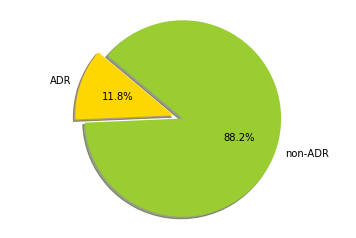

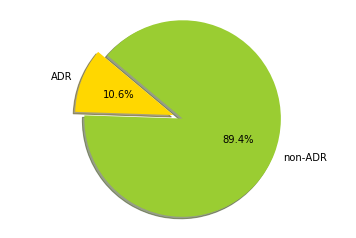

In [7]:
# Data to plot
labels = 'ADR', 'non-ADR'
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot Train Data
plt.pie([train_adr_data_count,train_nonadr_data_count], explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Plot Dev Data
plt.pie([dev_adr_count,dev_nonadr_count], explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


In [8]:
# Training data
train_features_label = train_features['class']
train_features.drop('class', axis = 1, inplace = True)
train_features.drop('id', axis = 1, inplace = True)

In [9]:
train_features_label.value_counts()

N    2793
Y     373
Name: class, dtype: int64

In [10]:
dev_features['class'].value_counts()

N    962
Y    114
Name: class, dtype: int64

## Gaussian Bayes

In [11]:
# Initialise with training data
clf = GaussianNB()
clf.fit(train_features, train_features_label)

GaussianNB(priors=None)

In [12]:
# Extract data without tweet id and class
dev_for_prediction = dev_features[dev_features.columns[1:-1]]
# Extract only class from dev data
dev_class = dev_features[dev_features.columns[-1]]

In [13]:
# Feed dev data into algorithm for evaluation
dev_pred_GNB = clf.predict(dev_for_prediction)

In [14]:
# Confusion matrix for GaussianBayes
GaussianCM = confusion_matrix(dev_class, dev_pred_GNB, labels = ["N","Y"])
GaussianCM

array([[912,  50],
       [ 75,  39]])

In [15]:
TP = GaussianCM[1, 1]
TN = GaussianCM[0, 0]
FP = GaussianCM[0, 1]
FN = GaussianCM[1, 0]

In [16]:
precision = TP / float(TP + FP)
print('Precision:',precision)

sensitivity = TP / float(FN + TP)
print('Recall', sensitivity)

specificity = TN / float(TN + FP)
print('Specificity',specificity)

('Precision:', 0.43820224719101125)
('Recall', 0.34210526315789475)
('Specificity', 0.94802494802494808)


In [17]:
pd.Series(dev_pred_GNB).value_counts()

N    987
Y     89
dtype: int64

In [18]:
print(classification_report(dev_class,dev_pred_GNB, labels = ["N","Y"]))

             precision    recall  f1-score   support

          N       0.92      0.95      0.94       962
          Y       0.44      0.34      0.38       114

avg / total       0.87      0.88      0.88      1076



In [19]:
accuracy_score(dev_class,dev_pred_GNB)

0.88382899628252787

In [20]:
dev_class.values[0:25],dev_pred_GNB[0:25]

(array(['N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
        'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype=object),
 array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y',
        'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'],
       dtype='|S1'))

In [21]:
from sklearn_evaluation import plot
import matplotlib.pyplot as eval_chart

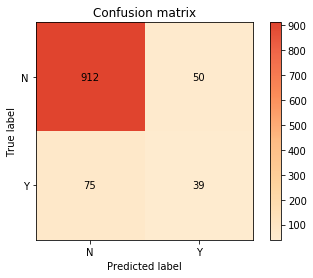

In [22]:
plot.confusion_matrix(dev_class, dev_pred_GNB,target_names=["N","Y"])
eval_chart.show()

## Multinomial Bayes

In [23]:
clfMulti = MultinomialNB()
clfMulti.fit(train_features, train_features_label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
dev_pred_MNB = clfMulti.predict(dev_for_prediction)

In [25]:
MultiNBCM = confusion_matrix(dev_class,dev_pred_MNB, labels = ["N","Y"])
MultiNBCM

array([[936,  26],
       [ 83,  31]])

In [26]:
TP = MultiNBCM[1, 1]
TN = MultiNBCM[0, 0]
FP = MultiNBCM[0, 1]
FN = MultiNBCM[1, 0]

In [27]:
precision = TP / float(TP + FP)
print('Precision:',precision)

sensitivity = TP / float(FN + TP)
print('Recall', sensitivity)

specificity = TN / float(TN + FP)
print('Specificity',specificity)

('Precision:', 0.54385964912280704)
('Recall', 0.27192982456140352)
('Specificity', 0.97297297297297303)


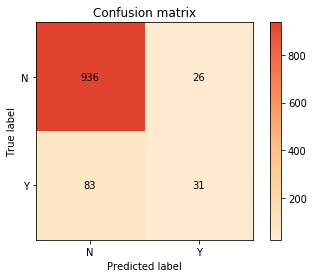

In [28]:
plot.confusion_matrix(dev_class, dev_pred_MNB,target_names=["N","Y"])
eval_chart.show()

In [29]:
pd.Series(dev_pred_MNB).value_counts()

N    1019
Y      57
dtype: int64

In [30]:
print(classification_report(dev_class,dev_pred_MNB, labels = ["N","Y"]))

             precision    recall  f1-score   support

          N       0.92      0.97      0.94       962
          Y       0.54      0.27      0.36       114

avg / total       0.88      0.90      0.88      1076



In [31]:
accuracy_score(dev_class,dev_pred_MNB)

0.89869888475836435

## Decision Tree

In [32]:
from sklearn import tree

In [33]:
# Default Tree setup
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(train_features, train_features_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
dev_prediction_descTree = tree_clf.predict(dev_for_prediction)

In [35]:
confusion_matrix(dev_class, dev_prediction_descTree,labels = ["Y","N"])

array([[ 31,  83],
       [ 65, 897]])

In [36]:
print(classification_report(dev_class ,dev_prediction_descTree,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.32      0.27      0.30       114
          N       0.92      0.93      0.92       962

avg / total       0.85      0.86      0.86      1076



In [37]:
accuracy_score(dev_class, dev_prediction_descTree)

0.86245353159851301

In [38]:
# Set maximum depth
tree_clf_md = tree.DecisionTreeClassifier(max_depth = 23)
tree_clf_md.fit(train_features, train_features_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=23,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
dev_prediction_mdTree = tree_clf_md.predict(dev_for_prediction)

In [40]:
confusion_matrix(dev_class, dev_prediction_mdTree,labels = ["Y","N"])

array([[ 23,  91],
       [ 26, 936]])

In [41]:
print(classification_report(dev_class ,dev_prediction_mdTree,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.47      0.20      0.28       114
          N       0.91      0.97      0.94       962

avg / total       0.86      0.89      0.87      1076



In [42]:
accuracy_score(dev_class, dev_prediction_mdTree)

0.89126394052044611

In [43]:
# Export Decision Trees
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(tree_clf_md, out_file=f)

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=23)
rf_clf.fit(train_features, train_features_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=23, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
dev_prediction_rf = rf_clf.predict(dev_for_prediction)

In [46]:
confusion_matrix(dev_class, dev_prediction_rf, labels = ["Y","N"])

array([[ 10, 104],
       [  9, 953]])

In [47]:
print(classification_report(dev_class,dev_prediction_rf,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.53      0.09      0.15       114
          N       0.90      0.99      0.94       962

avg / total       0.86      0.89      0.86      1076



In [48]:
accuracy_score(dev_class, dev_prediction_rf)

0.89498141263940523

In [49]:
print(dev_for_prediction.columns[39])
print(dev_for_prediction.columns[47])
print(dev_for_prediction.columns[49])
print(dev_for_prediction.columns[53])
print(dev_for_prediction.columns[41])

is
making
messed
natural
lamotrigine


In [50]:
dev_for_prediction.columns

Index([u'allergic', u'am', u'appetite', u'bad', u'bananas', u'bed', u'been',
       u'body', u'but', u'can', u'caused', u'causing', u'chemical',
       u'commercial', u'contain', u'crippled', u'crying', u'cymbalta',
       u'definitely', u'depression', u'diary', u'dont', u'drowsy', u'due',
       u'effexor', u'experiencing', u'fda', u'feel', u'fluid', u'found',
       u'gain', u'gained', u'glassncision', u'had', u'hating', u'headaches',
       u'help', u'hurts', u'i', u'is', u'it', u'lamotrigine', u'lbs', u'legs',
       u'lozenge', u'made', u'makes', u'making', u'me', u'messed', u'munchies',
       u'muscle', u'my', u'natural', u'neck', u'next', u'nicotine',
       u'nightmare', u'off', u'olanzapine', u'on', u'pain', u'pains',
       u'person', u'pic', u'prozac', u'quetiapine', u'restless', u'retention',
       u'rivaroxaban', u'rt', u'same', u'sense', u'seroquel', u'sick',
       u'since', u'skin', u'sleep', u'stone', u'taking', u'tendon', u'this',
       u'though', u'tired', u'uberf

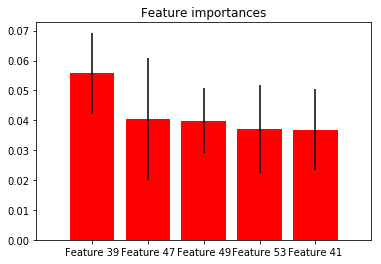

In [51]:
f = plot.feature_importances(rf_clf, top_n=5)
eval_chart.show()

## Support Vector Machine

In [52]:
from sklearn import svm
svm_clf = svm.LinearSVC(C=0.2)
svm_clf.fit(train_features,train_features_label)

LinearSVC(C=0.2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [53]:
dev_prediction_svm = svm_clf.predict(dev_for_prediction)

In [54]:
confusion_matrix(dev_class, dev_prediction_svm,labels = ["Y","N"])

array([[ 23,  91],
       [ 15, 947]])

In [55]:
print(classification_report(dev_class,dev_prediction_svm,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.61      0.20      0.30       114
          N       0.91      0.98      0.95       962

avg / total       0.88      0.90      0.88      1076



In [56]:
accuracy_score(dev_class,dev_prediction_svm)

0.9014869888475836

## Feature Engineering

In [57]:
from sklearn.feature_extraction import DictVectorizer
import string
import re
from collections import Counter 

## ADR Lexicon Features

In [58]:
# Load ADR Lexicon data
adrlex_list = []
with open('data/ADR_lexicon.tsv') as adr_lex:
    n = 0
    for line in adr_lex:
        if n > 20:
            items = line.split('\t')
            if len(items[1])>6:
                _name = string.strip(string.lower(items[1]))
                _cui = string.strip(items[0])
                adrlex_list.append((_cui,_name))
        if n <= 20: n += 1

In [59]:
vec = DictVectorizer()

In [60]:
patterns_dict = {re.compile(ade) : ade for (cui,ade) in adrlex_list}

In [61]:
## Map training data to ADR lexical
train_adr_count = {}
train_adr_presence = {}

for data in train_tw_all:
    tweet = data['text']
    id = int(data['id'])

    adr_presence = 0
    adr_count = 0
    for pattern in patterns_dict.keys():
        adrs = re.search(pattern,tweet)
        if adrs != None:
            adr_presence = 1
            adr_count += 1
    train_adr_count[id] = adr_count
    train_adr_presence[id] = adr_presence

In [62]:
## Map dev data to ADR lexical
dev_adr_count = {}
dev_adr_presence = {}

for data in dev_tw_all:
    tweet = data['text']
    id = int(data['id'])

    adr_presence = 0
    adr_count = 0
    for pattern in patterns_dict.keys():
        adrs = re.search(pattern,tweet)
        if adrs != None:
            adr_presence = 1
            adr_count += 1

    dev_adr_count[id] = adr_count
    dev_adr_presence[id] = adr_presence

In [63]:
# Load Test data
test_tw_all = []
with open('data/test/test.txt') as f:
    for line in f:
        split_text = line.strip().split('\t')
        test_tw_all.append({
            'id': split_text[0],
            'text': split_text[2],
            'label': split_text[1]
        })

In [64]:
## Map test data to ADR lexical
test_adr_count = {}
test_adr_presence = {}

for data in test_tw_all:
    tweet = data['text']
    id = int(data['id'])

    adr_presence = 0
    adr_count = 0
    for pattern in patterns_dict.keys():
        adrs = re.search(pattern,tweet)
        if adrs != None:
            adr_presence = 1
            adr_count += 1

    test_adr_count[id] = adr_count
    test_adr_presence[id] = adr_presence

In [65]:
## Add two new features to training set
train_features_new = pd.read_csv('data/train/train.csv')
train_features_new['adr_presence'] = train_features_new['id'].map(train_adr_presence)
train_features_new['adr_count'] = train_features_new['id'].map(train_adr_count)
train_features_new.head(n=5)

,id,allergic,am,appetite,bad,bananas,bed,been,body,but,...,up,was,weight,withdrawal,withdrawals,wondering,zombie,class,adr_presence,adr_count
0,326376825590779905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,N,1,2
1,326398829849092097,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,Y,1,1
2,326406322323066883,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,Y,1,1
3,326407491460141056,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,N,1,2
4,326453069795688449,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,N,0,0


In [69]:
## Add two new features to dev set
dev_features_new = pd.read_csv('data/dev/dev.csv')
dev_features_new['adr_presence'] = dev_features_new['id'].map(dev_adr_presence)
dev_features_new['adr_count'] = dev_features_new['id'].map(dev_adr_count)
dev_features_new.head()

,id,allergic,am,appetite,bad,bananas,bed,been,body,but,...,up,was,weight,withdrawal,withdrawals,wondering,zombie,class,adr_presence,adr_count
0,326379831954661376,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,N,1,1
1,326393333066919936,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,N,0,0
2,326398219192000512,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,N,0,0
3,326446459631321088,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,N,0,0
4,326468233978855426,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,N,0,0


In [70]:
## Add two new features to test set
test_features_new = pd.read_csv('data/test/test.csv')
test_features_new['adr_presence'] = test_features_new['id'].map(test_adr_presence)
test_features_new['adr_count'] = test_features_new['id'].map(test_adr_count)
test_features_new.head()

,id,allergic,am,appetite,bad,bananas,bed,been,body,but,...,up,was,weight,withdrawal,withdrawals,wondering,zombie,class,adr_presence,adr_count
0,326428925972582402,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,?,1,2
1,326469551128723460,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,?,0,0
2,326496283516882944,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,?,0,0
3,326499885656461313,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,?,0,0
4,326532133399166976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,?,0,0


## Sentiment Analysis

In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [72]:
## Map training data to ADR lexical
train_sentiment = {}

for data in train_tw_all:
    tweet = data['text']
    id = int(data['id'])
    
    scores = analyzer.polarity_scores(tweet)
    train_sentiment[id] = 1 if scores['compound'] <= -0.5 else 0

In [73]:
## Map dev data to ADR lexical
dev_sentiment = {}

for data in dev_tw_all:
    tweet = data['text']
    id = int(data['id'])
    
    scores = analyzer.polarity_scores(tweet)
    dev_sentiment[id] = 1 if scores['compound'] <= 0.5 else 0

In [74]:
## Map test data to ADR lexical
test_sentiment = {}

for data in test_tw_all:
    tweet = data['text']
    id = int(data['id'])
    
    scores = analyzer.polarity_scores(tweet)
    test_sentiment[id] = 1 if scores['compound'] <= 0.5 else 0

In [75]:
dev_features_new['neg_sent'] = dev_features_new['id'].map(dev_sentiment)
train_features_new['neg_sent'] = train_features_new['id'].map(train_sentiment)
test_features_new['neg_sent'] = test_features_new['id'].map(test_sentiment)

In [76]:
train_features_new.head()

,id,allergic,am,appetite,bad,bananas,bed,been,body,but,...,was,weight,withdrawal,withdrawals,wondering,zombie,class,adr_presence,adr_count,neg_sent
0,326376825590779905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,N,1,2,0
1,326398829849092097,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,Y,1,1,0
2,326406322323066883,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,Y,1,1,1
3,326407491460141056,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,N,1,2,0
4,326453069795688449,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,N,0,0,0


In [77]:
dev_features_new.head()

,id,allergic,am,appetite,bad,bananas,bed,been,body,but,...,was,weight,withdrawal,withdrawals,wondering,zombie,class,adr_presence,adr_count,neg_sent
0,326379831954661376,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,N,1,1,0
1,326393333066919936,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,N,0,0,1
2,326398219192000512,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,N,0,0,1
3,326446459631321088,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,N,0,0,1
4,326468233978855426,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,N,0,0,1


In [78]:
test_features_new.head()

,id,allergic,am,appetite,bad,bananas,bed,been,body,but,...,was,weight,withdrawal,withdrawals,wondering,zombie,class,adr_presence,adr_count,neg_sent
0,326428925972582402,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,?,1,2,1
1,326469551128723460,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,?,0,0,1
2,326496283516882944,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,?,0,0,1
3,326499885656461313,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,?,0,0,0
4,326532133399166976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,?,0,0,1


## Setup Training / Dev / Test Data

### Training

In [79]:
train_feat_adr = train_features_new.copy(deep=True)
train_feat_sent = train_features_new.copy(deep=True)
train_feat_all = train_features_new.copy(deep=True)

train_features_label_new = train_features_new['class']
# Only ADR Lexicon
train_feat_adr.drop('class', axis = 1, inplace = True)
train_feat_adr.drop('id', axis = 1, inplace = True)
train_feat_adr.drop('neg_sent', axis = 1, inplace = True)

# Only with negative sentiment
train_feat_sent.drop('class', axis = 1, inplace = True)
train_feat_sent.drop('id', axis = 1, inplace = True)
train_feat_sent.drop('adr_presence', axis = 1, inplace = True)
train_feat_sent.drop('adr_count', axis = 1, inplace = True)

# All new features
train_feat_all.drop('class', axis = 1, inplace = True)
train_feat_all.drop('id', axis = 1, inplace = True)

### Development

In [80]:
dev_feat_adr = dev_features_new.copy(deep=True)
dev_feat_sent = dev_features_new.copy(deep=True)
dev_feat_all = dev_features_new.copy(deep=True)

dev_class_new = dev_features_new['class']
# Only ADR Lexicon
dev_feat_adr.drop('class', axis = 1, inplace = True)
dev_feat_adr.drop('id', axis = 1, inplace = True)
dev_feat_adr.drop('neg_sent', axis = 1, inplace = True)

# Only with negative sentiment
dev_feat_sent.drop('class', axis = 1, inplace = True)
dev_feat_sent.drop('id', axis = 1, inplace = True)
dev_feat_sent.drop('adr_presence', axis = 1, inplace = True)
dev_feat_sent.drop('adr_count', axis = 1, inplace = True)

# All new features
dev_feat_all.drop('class', axis = 1, inplace = True)
dev_feat_all.drop('id', axis = 1, inplace = True)

### Test

In [81]:
test_feat_all = test_features_new.copy(deep=True)

# All new features
test_feat_all.drop('class', axis = 1, inplace = True)
test_feat_all.drop('id', axis = 1, inplace = True)
test_feat_all.head()

,allergic,am,appetite,bad,bananas,bed,been,body,but,can,...,up,was,weight,withdrawal,withdrawals,wondering,zombie,adr_presence,adr_count,neg_sent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Phase 2 experiment
## Random Forest

In [341]:
rf_clf_adr = RandomForestClassifier(max_depth=23)
rf_clf_adr.fit(train_feat_adr, train_features_label_new)

rf_clf_sent = RandomForestClassifier(max_depth=23)
rf_clf_sent.fit(train_feat_sent, train_features_label_new)

rf_clf_all = RandomForestClassifier(max_depth=23)
rf_clf_all.fit(train_feat_all, train_features_label_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=23, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [342]:
dev_pred_adr = rf_clf_adr.predict(dev_feat_adr)
dev_pred_sent = rf_clf_sent.predict(dev_feat_sent)
dev_pred_all = rf_clf_all.predict(dev_feat_all)

In [343]:
confusion_matrix(dev_class_new, dev_pred_adr,labels = ["Y","N"])

array([[ 16,  98],
       [ 12, 950]])

In [344]:
confusion_matrix(dev_class_new, dev_pred_sent,labels = ["Y","N"])

array([[ 11, 103],
       [ 23, 939]])

In [345]:
confusion_matrix(dev_class_new, dev_pred_all,labels = ["Y","N"])

array([[ 23,  91],
       [ 21, 941]])

In [346]:
print(classification_report(dev_class_new,dev_pred_adr,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.57      0.14      0.23       114
          N       0.91      0.99      0.95       962

avg / total       0.87      0.90      0.87      1076



In [347]:
print(classification_report(dev_class_new,dev_pred_sent,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.32      0.10      0.15       114
          N       0.90      0.98      0.94       962

avg / total       0.84      0.88      0.85      1076



In [348]:
print(classification_report(dev_class_new,dev_pred_all,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.52      0.20      0.29       114
          N       0.91      0.98      0.94       962

avg / total       0.87      0.90      0.87      1076



In [349]:
accuracy_score(dev_class_new,dev_pred_adr)

0.89776951672862448

In [350]:
accuracy_score(dev_class_new,dev_pred_sent)

0.88289962825278812

In [351]:
accuracy_score(dev_class_new,dev_pred_all)

0.89591078066914498

## SVM

In [352]:
from sklearn import svm
svm_clf_adr = svm.LinearSVC(C=0.2)
svm_clf_adr.fit(train_feat_adr,train_features_label_new)

svm_clf_sent = svm.LinearSVC(C=0.2)
svm_clf_sent.fit(train_feat_sent,train_features_label_new)

svm_clf_all = svm.LinearSVC(C=0.2)
svm_clf_all.fit(train_feat_all,train_features_label_new)

LinearSVC(C=0.2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [353]:
dev_pred_svm_adr = svm_clf_adr.predict(dev_feat_adr)
dev_pred_svm_sent = svm_clf_sent.predict(dev_feat_sent)
dev_pred_svm_all = svm_clf_all.predict(dev_feat_all)

In [354]:
confusion_matrix(dev_class_new, dev_pred_svm_adr,labels = ["Y","N"])

array([[ 21,  93],
       [ 15, 947]])

In [355]:
confusion_matrix(dev_class_new, dev_pred_svm_sent,labels = ["Y","N"])

array([[ 25,  89],
       [ 19, 943]])

In [356]:
confusion_matrix(dev_class_new, dev_pred_svm_all,labels = ["Y","N"])

array([[ 25,  89],
       [ 15, 947]])

In [357]:
print(classification_report(dev_class_new,dev_pred_svm_adr,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.58      0.18      0.28       114
          N       0.91      0.98      0.95       962

avg / total       0.88      0.90      0.88      1076



In [358]:
print(classification_report(dev_class_new,dev_pred_svm_sent,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.57      0.22      0.32       114
          N       0.91      0.98      0.95       962

avg / total       0.88      0.90      0.88      1076



In [359]:
print(classification_report(dev_class_new,dev_pred_svm_all,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.62      0.22      0.32       114
          N       0.91      0.98      0.95       962

avg / total       0.88      0.90      0.88      1076



In [360]:
accuracy_score(dev_class_new,dev_pred_svm_adr)

0.8996282527881041

In [361]:
accuracy_score(dev_class_new,dev_pred_svm_sent)

0.8996282527881041

In [362]:
accuracy_score(dev_class_new,dev_pred_svm_all)

0.90334572490706322

## Gaussian NB

In [363]:
clf_adr = GaussianNB()
clf_adr.fit(train_feat_adr, train_features_label_new)

clf_sent = GaussianNB()
clf_sent.fit(train_feat_sent, train_features_label_new)

clf_all = GaussianNB()
clf_all.fit(train_feat_all, train_features_label_new)

GaussianNB(priors=None)

In [364]:
dev_pred_gnb_adr = clf_adr.predict(dev_feat_adr)
dev_pred_gnb_sent = clf_sent.predict(dev_feat_sent)
dev_pred_gnb_all = clf_all.predict(dev_feat_all)

In [365]:
confusion_matrix(dev_class_new, dev_pred_gnb_adr,labels = ["Y","N"])

array([[ 39,  75],
       [ 52, 910]])

In [366]:
confusion_matrix(dev_class_new, dev_pred_gnb_sent,labels = ["Y","N"])

array([[ 39,  75],
       [ 50, 912]])

In [367]:
confusion_matrix(dev_class_new, dev_pred_gnb_all,labels = ["Y","N"])

array([[ 39,  75],
       [ 52, 910]])

In [368]:
print(classification_report(dev_class_new,dev_pred_gnb_adr,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.43      0.34      0.38       114
          N       0.92      0.95      0.93       962

avg / total       0.87      0.88      0.88      1076



In [369]:
print(classification_report(dev_class_new,dev_pred_gnb_sent,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.44      0.34      0.38       114
          N       0.92      0.95      0.94       962

avg / total       0.87      0.88      0.88      1076



In [370]:
print(classification_report(dev_class_new,dev_pred_gnb_all,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.43      0.34      0.38       114
          N       0.92      0.95      0.93       962

avg / total       0.87      0.88      0.88      1076



In [371]:
accuracy_score(dev_class_new,dev_pred_gnb_adr)

0.88197026022304836

In [372]:
accuracy_score(dev_class_new,dev_pred_gnb_sent)

0.88382899628252787

In [373]:
accuracy_score(dev_class_new,dev_pred_gnb_all)

0.88197026022304836

## Multinomial NB

In [374]:
clfMulti_adr = MultinomialNB()
clfMulti_adr.fit(train_feat_adr, train_features_label_new)

clfMulti_sent = MultinomialNB()
clfMulti_sent.fit(train_feat_sent, train_features_label_new)

clfMulti_all = MultinomialNB()
clfMulti_all.fit(train_feat_all, train_features_label_new)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [375]:
dev_multinb_pred_adr = clfMulti_adr.predict(dev_feat_adr)
dev_multinb_pred_sent = clfMulti_sent.predict(dev_feat_sent)
dev_multinb_pred_all = clfMulti_all.predict(dev_feat_all)

In [376]:
confusion_matrix(dev_class_new, dev_multinb_pred_adr,labels = ["Y","N"])

array([[ 34,  80],
       [ 27, 935]])

In [377]:
confusion_matrix(dev_class_new, dev_multinb_pred_sent,labels = ["Y","N"])

array([[ 33,  81],
       [ 29, 933]])

In [378]:
confusion_matrix(dev_class_new, dev_multinb_pred_all,labels = ["Y","N"])

array([[ 35,  79],
       [ 28, 934]])

In [379]:
print(classification_report(dev_class_new,dev_multinb_pred_adr,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.56      0.30      0.39       114
          N       0.92      0.97      0.95       962

avg / total       0.88      0.90      0.89      1076



In [380]:
print(classification_report(dev_class_new,dev_multinb_pred_sent,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.53      0.29      0.38       114
          N       0.92      0.97      0.94       962

avg / total       0.88      0.90      0.88      1076



In [381]:
print(classification_report(dev_class_new,dev_multinb_pred_all,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.56      0.31      0.40       114
          N       0.92      0.97      0.95       962

avg / total       0.88      0.90      0.89      1076



In [388]:
accuracy_score(dev_class_new,dev_multinb_pred_adr)

0.90055762081784385

In [383]:
accuracy_score(dev_class_new,dev_multinb_pred_sent)

0.89776951672862448

In [387]:
accuracy_score(dev_class_new,dev_multinb_pred_all)

0.90055762081784385

### Decision Tree

In [404]:
tree_adr = tree.DecisionTreeClassifier(max_depth=23)
tree_adr.fit(train_feat_adr, train_features_label_new)

tree_sent = tree.DecisionTreeClassifier(max_depth=23)
tree_sent.fit(train_feat_sent, train_features_label_new)

tree_all = tree.DecisionTreeClassifier(max_depth=23)
tree_all.fit(train_feat_all, train_features_label_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=23,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [405]:
dev_pred_dt_adr = tree_adr.predict(dev_feat_adr)
dev_pred_dt_sent = tree_sent.predict(dev_feat_sent)
dev_pred_dt_all = tree_all.predict(dev_feat_all)

In [406]:
accuracy_score(dev_class_new,dev_pred_dt_adr)

0.8810408921933085

In [407]:
accuracy_score(dev_class_new,dev_pred_dt_sent)

0.85315985130111527

In [408]:
accuracy_score(dev_class_new,dev_pred_dt_all)

0.8689591078066915

In [409]:
print(classification_report(dev_class_new,dev_pred_dt_all,labels = ["Y","N"]))

             precision    recall  f1-score   support

          Y       0.37      0.34      0.36       114
          N       0.92      0.93      0.93       962

avg / total       0.86      0.87      0.87      1076



## Evaluate Test Data

In [82]:
svm_clf_test = svm.LinearSVC(C=0.2)
svm_clf_test.fit(train_feat_all,train_features_label_new)

LinearSVC(C=0.2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [84]:
test_feat_all.head()

,allergic,am,appetite,bad,bananas,bed,been,body,but,can,...,up,was,weight,withdrawal,withdrawals,wondering,zombie,adr_presence,adr_count,neg_sent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [117]:
test_pred_svm_all = svm_clf_test.predict(test_feat_all)

In [118]:
test_pred_svm_all

array(['N', 'N', 'N', ..., 'N', 'N', 'Y'], dtype=object)

## Generate new ARFF file

In [100]:
import pandas2arff

In [142]:
# Training
train_features_new.to_csv('data/new_features/train.csv',index=False)

In [143]:
# dev
dev_features_new.to_csv('data/new_features/dev.csv',index=False)

In [113]:
test_new_features = test_features_new.copy(deep=True)

# All new features
test_new_features.drop('class', axis = 1, inplace = True)
test_new_features.head()

,id,allergic,am,appetite,bad,bananas,bed,been,body,but,...,up,was,weight,withdrawal,withdrawals,wondering,zombie,adr_presence,adr_count,neg_sent
0,326428925972582402,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
1,326469551128723460,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,326496283516882944,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,326499885656461313,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,326532133399166976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [120]:
test_new_features['class'] = test_pred_svm_all

In [144]:
test_new_features.to_csv('data/new_features/test.csv',index=False)

In [138]:
test_new_features[test_new_features['class'] == 'N'].head()

,id,allergic,am,appetite,bad,bananas,bed,been,body,but,...,was,weight,withdrawal,withdrawals,wondering,zombie,adr_presence,adr_count,neg_sent,class
0,326428925972582402,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,N
1,326469551128723460,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,N
2,326496283516882944,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,N
3,326499885656461313,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
4,326532133399166976,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,N


In [137]:
filter(lambda d: d['id'] == '326499885656461313', test_tw_all)

[{'id': '326499885656461313',
  'label': '?',
  'text': '@wildpursuits @modelbebegirl me I take pretty strong doses of: Fluoxetine, Lithium, and Seroquel'}]

In [127]:
test_new_features['class'].value_counts()

N    1039
Y      48
Name: class, dtype: int64

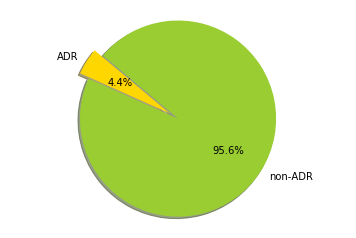

In [128]:
# Data to plot
labels = 'ADR', 'non-ADR'
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot Train Data
plt.pie([48,1039], explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()